# DAT210x - Programming with Python for DS

## Module5- Lab3

In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans

matplotlib.style.use('ggplot') # Look Pretty

A convenience function for you to use:

In [2]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [43]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
    # Ensure there's at least on cluster...
    minSamples = len(model.labels_)
    minCluster = 0
    
    for i in range(len(model.cluster_centers_)):
        if minSamples > (model.labels_==i).sum():
            minCluster = i
            minSamples = (model.labels_==i).sum()

    print("\n  Cluster With Fewest Samples: ", minCluster)
    return (model.labels_==minCluster)

In [4]:
# Find cluster with most # attached nodes
def clusterWithMostSamples(model):
    # Ensure at least one cluster
    # minSamples is the number of points/observations in the dataframe that was clustered
    minSamples = 0
    maxCluster = 0
    
    # s/b as many .cluster_centers_ as number of clusters specified in KMeans call
    for i in range(len(model.cluster_centers_)):
        # check if minSamples (init = 0) is less than number of points assigned to this cluster node
        if minSamples < (model.labels_==i).sum():
            # if so, set maxCluster to this cluster node and set minSamples to this cluster node's number of observations
            maxCluster = i
            minSamples = (model.labels_==i).sum()
            
    print("\n  Cluster with Most Samples: ", maxCluster)
    return maxCluster

### CDRs

A [call detail record](https://en.wikipedia.org/wiki/Call_detail_record) (CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset we've curated for you contains call records for 10 people, tracked over the course of 3 years. Your job in this assignment is to find out where each of these people likely live and where they work at!

Start by loading up the dataset and taking a peek at its `head` and `dtypes`. You can convert date-strings to real date-time objects using `pd.to_datetime`, and the times using `pd.to_timedelta`:

In [5]:
df = pd.read_csv('./Datasets/CDR.csv', header=0)
df.loc[:, 'CallDate'] = pd.to_datetime(df.loc[:, 'CallDate'], errors='coerce')
df.loc[:, 'CallTime'] = pd.to_timedelta(df.loc[:, 'CallTime'], errors='coerce')
df.shape
#df.head(10)
# df.dtypes

(53188, 10)

Create a unique list of the phone number values (people) stored in the `In` column of the dataset, and save them in a regular python list called `unique_numbers`. Manually check through `unique_numbers` to ensure the order the numbers appear is the same order they (uniquely) appear in your dataset:

In [6]:
uniquecallers = df.In.unique().tolist()

Using some domain expertise, your intuition should direct you to know that people are likely to behave differently on weekends vs on weekdays:

#### On Weekends
1. People probably don't go into work
1. They probably sleep in late on Saturday
1. They probably run a bunch of random errands, since they couldn't during the week
1. They should be home, at least during the very late hours, e.g. 1-4 AM

#### On Weekdays
1. People probably are at work during normal working hours
1. They probably are at home in the early morning and during the late night
1. They probably spend time commuting between work and home everyday

In [7]:
print("Examining person: ", 0)

Examining person:  0


Create a slice called `user1` that filters to only include dataset records where the `In` feature (user phone number) is equal to the first number on your unique list above:

In [8]:
user1slice = df.loc[:, 'In'] == uniquecallers[0]

Alter your slice so that it includes only Weekday (Mon-Fri) values:

In [9]:
user1sliceA = (df.loc[:, 'In'] == uniquecallers[0])
user1sliceB = (df.loc[:, 'DOW'].isin(['Mon', 'Tue', 'Wed', 'Thr', 'Fri']))
user1slice2 = (user1sliceA & user1sliceB)
user1 = df.loc[user1slice2, :]
user1.head(10)

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
161,4638472273,5912117253,Missed,2010-12-27,18:41:14.639828,Mon,0:00:20.304073,09756fb6-223f-43e9-9402-9b90c7048639,32.805667,-96.796667
194,4638472273,4217121115,Incoming,2010-12-28,21:36:14.190286,Tue,0:05:56.080785,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417
195,4638472273,6022767590,Incoming,2010-12-28,19:57:19.501140,Tue,0:02:38.219371,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417
196,4638472273,5621270003,Incoming,2010-12-28,17:10:15.465881,Tue,0:01:56.250335,78512965-e30b-4734-ae92-47b910fe3d7f,32.899944,-96.910389
197,4638472273,5481755331,Incoming,2010-12-28,16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
198,4638472273,7756914135,Incoming,2010-12-28,19:41:43.122708,Tue,0:05:08.460490,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
199,4638472273,6150928001,Incoming,2010-12-28,18:05:51.247679,Tue,0:04:13.034708,f9a9468b-dca3-4510-8fc1-1cba8dc77882,32.753500,-96.742528
200,4638472273,8180005891,Incoming,2010-12-28,15:27:51.105337,Tue,0:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
201,4638472273,6022767590,Missed,2010-12-28,20:43:50.766312,Tue,0:03:23.651369,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
245,4638472273,2666307251,Incoming,2010-12-29,18:20:56.628554,Wed,0:03:55.018670,f9a9468b-dca3-4510-8fc1-1cba8dc77882,32.753500,-96.742528


The idea is that the call was placed before 5pm. From Midnight-730a, the user is probably sleeping and won't call / wake up to take a call. There should be a brief time in the morning during their commute to work, then they'll spend the entire day at work. So the assumption is that most of the time is spent either at work, or in 2nd, at home:

In [10]:
user1slice3A = (df.loc[:, 'CallTime'] < '17:00:00')
user1 = user1.loc[user1slice3A, :]
user1.head(10)

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
197,4638472273,5481755331,Incoming,2010-12-28,16:20:11.532130,Tue,0:03:56.069765,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
200,4638472273,8180005891,Incoming,2010-12-28,15:27:51.105337,Tue,0:03:30.047757,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
248,4638472273,8180005891,Missed,2010-12-29,09:13:35.198987,Wed,0:02:10.574446,95c91e8b-6ff1-4893-9df3-b0342636bd25,32.899944,-96.910389
249,4638472273,2145623768,Incoming,2010-12-29,06:02:11.319738,Wed,0:04:34.436752,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
250,4638472273,8068555700,Incoming,2010-12-29,13:54:14.724722,Wed,0:03:31.297111,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
251,4638472273,8180005891,Incoming,2010-12-29,15:45:52.307534,Wed,0:05:34.587700,bf3bf815-3795-4be6-bec3-12b8f713e50d,32.899944,-96.910389
321,4638472273,2145623768,Incoming,2010-12-30,06:26:22.828987,Thr,0:02:18.762047,9baa92e7-e990-4e9e-8c0a-4c17cb4ecc7c,32.731611,-96.709417
323,4638472273,8180005891,Missed,2010-12-30,09:31:15.879551,Thr,0:00:40.900583,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389
403,4638472273,4217121115,Incoming,2010-12-31,08:29:48.427392,Fri,0:01:50.428576,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
406,4638472273,2946222380,Incoming,2010-12-31,08:55:44.522912,Fri,0:02:11.781534,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389


Plot the Cell Towers the user connected to

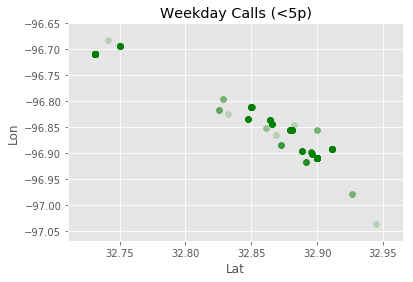

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLat,user1.TowerLon, c='g', marker='o', alpha=0.2)
ax.set_title('Weekday Calls (<5p)')
ax.set_xlabel('Lat')
ax.set_ylabel('Lon')
plt.show()

In [12]:
def doKMeans(data, n_clusters=2):
    # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
    # data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
    # no feature scaling is required. Print out the centroid locations and add them onto your scatter
    # plot. Use a distinguishable marker and color.
    #
    # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first). This is part
    # of your domain expertise. Also, *YOU* need to create, initialize (and return) the variable named
    # `model` here, which will be a SKLearn K-Means model for this to work:
    
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data.TowerLat, data.TowerLon, c='pink', marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    columns = ['TowerLat', 'TowerLon']
    data = data.loc[:, columns]

    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=n_clusters).fit(data)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    # print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
        
    return model

Let's tun K-Means with `K=3` or `K=4`. There really should only be a two areas of concentration. If you notice multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another), then increase K=5, with the goal being that all centroids except two will sweep up the annoying outliers and not-home, not-work travel occasions. the other two will zero in on the user's approximate home location and work locations. Or rather the location of the cell tower closest to them.....

In [13]:
model = doKMeans(user1, 4)

Print out the mean `CallTime` value for the samples belonging to the cluster with the LEAST samples attached to it. If our logic is correct, the cluster with the MOST samples will be work. The cluster with the 2nd most samples will be home. And the `K=3` cluster with the least samples should be somewhere in between the two. What time, on average, is the user in between home and work, between the midnight and 5pm?

In [14]:
midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print("    Its Waypoint Time: ", midWaySamples.CallTime.mean())


  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 07:47:50.059087


In [15]:
# Broken due to changing return value to integer index for max cluster
# midWayClusterIndices = clusterWithMostSamples(model)
# midWaySamples = user1[midWayClusterIndices]
# print("    Its Waypoint Time: ", midWaySamples.CallTime.mean())

Let's visualize the results! First draw the X's for the clusters:

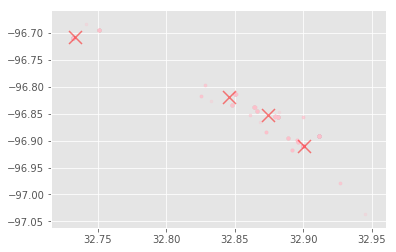

In [16]:
ax.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,0], s=169, c='r', marker='x', alpha=0.8, linewidths=2)
ax.set_title('Weekday Calls Centroids')
plt.show()

In [40]:
usercentroids = []

for x in (uniquecallers):
    usersliceA = (df.loc[:, 'In'] == x)
    usersliceB = (df.loc[:, 'DOW'].isin(['Mon', 'Tue', 'Wed', 'Thr', 'Fri']))
    usersliceC = (df.loc[:, 'CallTime'] < '17:00:00')
    userslice = (usersliceA & usersliceB & usersliceC)
    
    userframe = df.loc[userslice, :]
    
    model = doKMeans(userframe, 3)
    
    maxCluster = clusterWithMostSamples(model)
        
    usercentroids.append([x, maxCluster, model.cluster_centers_[maxCluster]])    

usercentroids    

urlpre = 'https://www.google.com/maps/dir//@'
urlpost = ',17z'

for x in usercentroids:
    print('telephone: ' + str(x[0]) + ' - cluster: ' + str(x[1]) + ': ')
    # middle: '32.9000436,-96.9115099'
    print('    Max Centroid: ' + urlpre + str(x[2][0]) + ',' + str(x[2][1])+ urlpost)

/Users/malcolmgin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0

  Cluster with Most Samples:  0
telephone: 4638472273 - cluster: 0: 
    Max Centroid: https://www.google.com/maps/dir//@32.900000903,-96.9095163858,17z
telephone: 1559410755 - cluster: 0: 
    Max Centroid: https://www.google.com/maps/dir//@32.6955770817,-96.9352272496,17z
telephone: 4931532174 - cluster: 0: 
    Max Centroid: https://www.google.com/maps/dir//@32.7799229941,-96.8933879054,17z
telephone: 2419930464 - cluster: 0: 
    Max Centroid: https://www.google.com/maps/dir//@32.8537122482,-96.8472892967,17z
telephone: 1884182865 - cluster: 0: 
    Max Centroid: https://www.google.com/maps/dir//@32.9219588585,-96.7576812128,17z
telephone: 3688089071 - cluster: 0: 
    Max Centroid: https:

In [55]:
usercentroids = []

for x in (uniquecallers):
    usersliceA = (df.loc[:, 'In'] == x)
    usersliceB = (df.loc[:, 'DOW'].isin(['Mon', 'Tue', 'Wed', 'Thr', 'Fri']))
    usersliceC = (df.loc[:, 'CallTime'] < '17:00:00')
    userslice = (usersliceA & usersliceB & usersliceC)
    
    userframe = df.loc[userslice, :]
    
    model = doKMeans(userframe, 3)
    
    # minCluster = clusterWithFewestSamples(model)
    midWayClusterIndices = clusterWithFewestSamples(model)
    midWaySamples = userframe[midWayClusterIndices]
    print("    (", x, "): Waypoint Time: ", midWaySamples.CallTime.mean())
    print('     centroids: ', model.cluster_centers_)
    
    usercentroids.append([x, int(model.labels_[midWayClusterIndices].mean()), model.cluster_centers_])    

usercentroids    

urlpre = 'https://www.google.com/maps/dir//@'
urlpost = ',17z'

for x in usercentroids:
    print('telephone: ' + str(x[0]) + ' - cluster: ' + str(x[1]) + ': ')
    # middle: '32.9000436,-96.9115099'
    print('    Min Centroid: ' + urlpre + str(x[2][0]) + ',' + str(x[2][1])+ urlpost)

/Users/malcolmgin/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



  Cluster With Fewest Samples:  2
    ( 4638472273 ): Waypoint Time:  0 days 07:49:53.168115
     centroids:  [[ 32.9000009  -96.90951639]
 [ 32.73323174 -96.70816184]
 [ 32.86348712 -96.83818346]]

  Cluster With Fewest Samples:  0
    ( 1559410755 ): Waypoint Time:  0 days 07:50:31.646646
     centroids:  [[ 32.73762409 -96.9164561 ]
 [ 32.87096795 -96.92355104]
 [ 32.69557708 -96.93522725]]

  Cluster With Fewest Samples:  2
    ( 4931532174 ): Waypoint Time:  0 days 07:53:05.627397
     centroids:  [[ 32.77992299 -96.89338791]
 [ 32.86562866 -96.86563953]
 [ 32.81309497 -96.88911725]]

  Cluster With Fewest Samples:  0
    ( 2419930464 ): Waypoint Time:  0 days 11:09:10.422402
     centroids:  [[ 32.86284941 -96.849683  ]
 [ 32.85371225 -96.8472893 ]
 [ 32.84684682 -96.83511392]]

  Cluster With Fewest Samples:  0
    ( 1884182865 ): Waypoint Time:  0 days 07:48:00.978543
     centroids:  [[ 32.909167   -96.741944  ]
 [ 32.875      -96.730278  ]
 [ 32.92195886 -96.75768121]]

  Cl